# In this project we are supposed to predict the sentiment of a given text, And predict if the text is positive, negative or neutral in nature.

### Importing necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import re
import nltk
import string
import nlp_utils
import collections
import contractions
import nlp_utils as nu
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize,sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
# Loading data. 
with open('TextAnalytics.txt','r') as f:
    text = f.read()

In [5]:
text
### The data is in the form of a text.

'0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you\'ll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to th

# Text Normalization

### Text normalization is the process of transforming a text into a canonical (standard) form. For example, the word “gooood” and “gud” can be transformed to “good”, its canonical form. Another example is mapping of near identical words such as “stopwords”, “stop-words” and “stop words” to just “stopwords”

In [6]:
# splitting at ( \n ).
text=text.split('\n')
# Separating at new line using '\n'  

In [7]:
# splitting at ( \t ).
corpus = [text]
for sent in text:
    corpus.append(sent.split('\t'))
# Splitting String by tab(\t)    

In [8]:
letters_only = re.sub(r'[^a-zA-Z]',  
                          " ",          
                          str(corpus))
# Taking only letters

### Tokenization
What is Tokenization?
Tokenization is the process by which big quantity of text is divided into smaller parts called tokens.

Natural language processing is used for building applications such as Text classification, intelligent chatbot, sentimental analysis, language translation, etc. It becomes vital to understand the pattern in the text to achieve the above-stated purpose. These tokens are very useful for finding such patterns as well as is considered as a base step for stemming and lemmatization.

Sentence tokenization is the process of splitting text into individual sentences. ... It does this by looking for the types of textual constructs that confuse the tokenizer and replacing them with single words.

In [9]:
# converting to lowercase.
letters_only=letters_only.lower()

token=nltk.sent_tokenize(letters_only)
#token

### Alphanumeric characters

In [10]:
def num_dec_al(word):
    if word.isnumeric():
        return 'xxxxxx'
    elif word.isdecimal():
        return 'xxx...'
    elif word.isalpha():
        return word
    else:
        return 'xxxaaa'

def clean_nda(token):
    tokens = nlp_utils.w_tokenization(token)
    map_list = list(map(num_dec_al,tokens))
    return " ".join(map_list)

corpus_nda = list(map(clean_nda,token))

#corpus_nda
### Alpha numeric characters and decimals have been replaced with characters

### Removing Contractions.
It is a process where words like isn't, didn't are expanded to is not did not. 
isn't --> is not, 
I'm --> I am, 
they're --> they are,
shouldn't --> should not,
can't --> can not

In [11]:
conm = contractions.CONTRACTION_MAP
def contraction_remove(corpus_nda):
    for key,value in conm.items():
        corpus_nda = re.sub(r"{}".format(key),'{}'.format(value),corpus_nda)
        
    return corpus_nda

special = string.punctuation
def w_tokenization(corpus_nda):
    # convert into lower case
    corpus_nda = corpus_nda.lower()
    # contraction
    corpus_nda = contraction_remove(corpus_nda)
    # 
    tokens = nltk.word_tokenize(corpus_nda) # word tokens
## contractions have been expanded and the letters have been converted to lowercase.    

In [12]:
#corpus_nda
## corpus_nda with expanded contractions and converted to lowercase.    

In [13]:
data = [corpus_nda]
for sent in text:
    data.append(sent.split('\t'))
# Separating at tab     

In [14]:
data.append(sent.split('\n'))
# Separating at newline

In [15]:
#data
# Cleaned text

In [16]:
df = pd.DataFrame(data)
## Saving the data into a dataframe.

In [17]:
df

,0,1,2,3,4,5,6
0,one of the other reviewers has mentioned that ...,None,None,None,None,None,None
1,"0,""One of the other reviewers has mentioned th...",None,None,None,None,None,None
2,"1,""A wonderful little production. <br /><br />...",None,None,None,None,None,None
3,"2,""I thought this was a wonderful way to spend...",None,None,None,None,None,None
4,"3,""Basically there's a family where a little b...",None,None,None,None,None,None
...,...,...,...,...,...,...,...
997,"996,""I hated it. I hate self-aware pretentious...",None,None,None,None,None,None
998,"997,""I usually try to be professional and cons...",None,None,None,None,None,None
999,"998,""If you like me is going to see this in a ...",None,None,None,None,None,None
1000,"999,""This is like a zoology textbook, given th...",None,None,None,None,None,None


In [18]:
df.drop([1,2,3,4,5,6],axis=1,inplace=True)
# dropping unnecessary columns.

In [19]:
df
# Resulting dataframe.

,0
0,one of the other reviewers has mentioned that ...
1,"0,""One of the other reviewers has mentioned th..."
2,"1,""A wonderful little production. <br /><br />..."
3,"2,""I thought this was a wonderful way to spend..."
4,"3,""Basically there's a family where a little b..."
...,...
997,"996,""I hated it. I hate self-aware pretentious..."
998,"997,""I usually try to be professional and cons..."
999,"998,""If you like me is going to see this in a ..."
1000,"999,""This is like a zoology textbook, given th..."


In [20]:
df= df.rename(columns={0: 'Text'})
# Renaming the column 0 as 'Text'

#### Final Dataset.

In [21]:
df

,Text
0,one of the other reviewers has mentioned that ...
1,"0,""One of the other reviewers has mentioned th..."
2,"1,""A wonderful little production. <br /><br />..."
3,"2,""I thought this was a wonderful way to spend..."
4,"3,""Basically there's a family where a little b..."
...,...
997,"996,""I hated it. I hate self-aware pretentious..."
998,"997,""I usually try to be professional and cons..."
999,"998,""If you like me is going to see this in a ..."
1000,"999,""This is like a zoology textbook, given th..."


### Rows 0,1 and 1000 and 1001 have repeated hence needs to be cleaned.

In [22]:
df.drop(df.index[:1], inplace=True)
# row 1 has repeated so it is dropped.

In [23]:
df.drop(df.index[1000:], inplace=True)
# row 1000 has repeated aswell, so it is dropped.

In [24]:
df

,Text
1,"0,""One of the other reviewers has mentioned th..."
2,"1,""A wonderful little production. <br /><br />..."
3,"2,""I thought this was a wonderful way to spend..."
4,"3,""Basically there's a family where a little b..."
5,"4,""Petter Mattei's """"Love in the Time of Money..."
...,...
996,"995,""Nothing is sacred. Just ask Ernie Fosseli..."
997,"996,""I hated it. I hate self-aware pretentious..."
998,"997,""I usually try to be professional and cons..."
999,"998,""If you like me is going to see this in a ..."


### Removing additional characters present in the dataframe.

In [25]:
## We can further see that there are still some special characters in the dataframe which have to be treated.
df.replace('\d+', '', regex=True, inplace=True)
df.replace(',', '', regex=True, inplace=True)
df.replace('br', '', regex=True, inplace=True)
df.replace('"', '', regex=True, inplace=True)
df.replace("'", '', regex=True, inplace=True)
df.replace('?', '', inplace=True)
df.replace("-", '', regex=True, inplace=True)
df.replace("*", '', inplace=True)
df.replace("***", '', inplace=True)
df.replace("...", '', inplace=True)
df.replace("/", '', inplace=True)
df.replace("\ '", '', regex=True, inplace=True)
df.replace("< />", '', regex=True, inplace=True)

In [26]:
df['Text'] = df['Text'].str.strip('[')
df['Text'] = df['Text'].str.strip(']')
df['Text'] = df['Text'].str.strip(')')
df['Text'] = df['Text'].str.strip('(')
## Using the strip function in order to delete the special characters.

In [27]:
df

,Text
1,One of the other reviewers has mentioned that ...
2,A wonderful little production. The filming tec...
3,I thought this was a wonderful way to spend ti...
4,Basically theres a family where a little boy (...
5,Petter Matteis Love in the Time of Money is a ...
...,...
996,Nothing is sacred. Just ask Ernie Fosselius. T...
997,I hated it. I hate selfaware pretentious inani...
998,I usually try to be professional and construct...
999,If you like me is going to see this in a film ...


## Lemmatization of the text column

Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma.
Lemmatization will generate the root form of the inflected words

In [28]:
df['Text'] = df['Text'].apply(nu.lemmatization_sentence)

In [29]:
Text=df['Text']

In [30]:
token=Text.values
## as_matrix() function is used to convert the given series or dataframe object to Numpy-array representation.

In [31]:
token=nltk.sent_tokenize(str(token))
## Sentence tokenization

In [32]:
data = np.array(token)
## Saving token in form of array

In [33]:
stop = stopwords.words('english')
## Saving stopwords in stop

### Removing stopwords from the dataframe

In [34]:
text = data
text_tokens = word_tokenize(str(text))

tokens_without_sw = [word for word in text_tokens if not word in stop]

print(tokens_without_sw)   
## Removing stopwords from the text and printing the words without stopwords

['[', '``', '[', "'one", 'reviewer', 'mention', 'watch', 'oz', 'episode', 'youll', 'hook', 'right', 'exactly', 'happen', 'me.the', 'first', 'thing', 'strike', 'oz', 'utality', 'unflinching', 'scene', 'violence', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'hearted', 'timid', 'show', 'pull', 'punch', 'regard', 'drug', 'sex', 'violence', 'hardcore', 'classic', 'use', 'word.it', 'call', 'oz', 'nickname', 'give', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focus', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inwards', 'privacy', 'high', 'agenda', 'em', 'city', 'home', 'many', '..', 'aryan', 'muslim', 'gangstas', 'latinos', 'christian', 'italian', 'irish', '....', 'scuffles', 'death', 'stare', 'dodgy', 'dealing', 'shady', 'agreement', 'never', 'far', 'away.i', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'go', 'show', 'wouldnt', 'dare', 'forget', 'pretty', 'picture', 'paint', 'mainstream', 'audienc

# Visualization

In [35]:
stopwords = set(stopwords.words("english"))
## Removing stopwords for wordcloud visualization

In [36]:
wordcloud = WordCloud(stopwords=stop, background_color="white", max_words=1000).generate(str(tokens_without_sw))
## WordCloud is a technique to show which words are the most frequent among the given text

### Visualizing the highest repeating words in the dataframe using  the wordcloud.

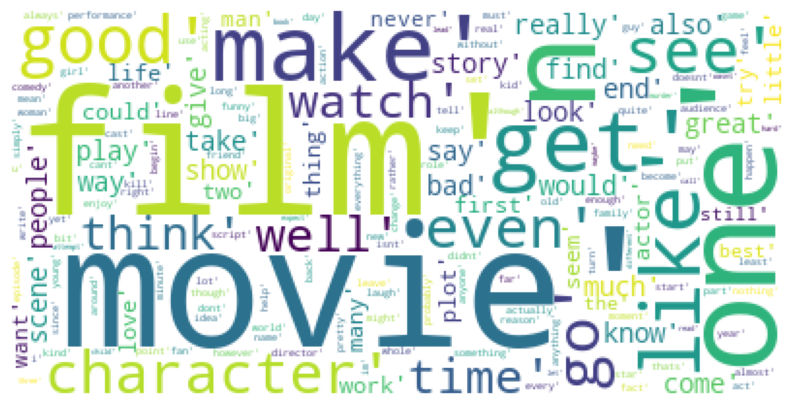

In [37]:
rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Counting the number of times a word has repeated through out the data.

In [38]:
tokens_without_sw=(str(tokens_without_sw))

In [39]:
filtered_words = [word for word in tokens_without_sw.split() if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)
# Removing stopwords as creating two lists to display the words and their counts    

In [40]:
counted_words.most_common(100) # the word 'movie' has repeated for 2081 times.

[("'movie',", 2019),
 ("'film',", 1773),
 ("'one',", 980),
 ("'make',", 888),
 ("'see',", 856),
 ("'like',", 828),
 ("'get',", 751),
 ("'good',", 644),
 ("'go',", 542),
 ("'watch',", 541),
 ("'time',", 533),
 ("'character',", 524),
 ("'even',", 510),
 ("'would',", 490),
 ("'bad',", 489),
 ("'think',", 471),
 ("'story',", 468),
 ("'really',", 452),
 ("'well',", 445),
 ("'scene',", 434),
 ("'much',", 392),
 ("'show',", 375),
 ("'great',", 375),
 ("'know',", 368),
 ("'take',", 361),
 ("'look',", 360),
 ("'people',", 356),
 ("'way',", 353),
 ("'give',", 349),
 ("'...',", 342),
 ("'say',", 336),
 ("'also',", 336),
 ("'come',", 333),
 ("'play',", 332),
 ("'first',", 325),
 ("'end',", 322),
 ("'find',", 309),
 ("'dont',", 309),
 ("'thing',", 299),
 ("'plot',", 297),
 ("'want',", 293),
 ("'many',", 283),
 ("'love',", 281),
 ("'work',", 275),
 ("'life',", 273),
 ("'never',", 272),
 ("'little',", 270),
 ("'seem',", 270),
 ("'could',", 269),
 ("'two',", 265),
 ("'actor',", 263),
 ("'best',", 258)

# Visualizing top 10 repeated/common words using bar graph.

In [41]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the headlines vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

<BarContainer object of 10 artists>

In [42]:
# Cell 14: Fast sentiment analysis using TextBlob
from textblob import TextBlob

def get_sentiment(text):
    """
    Get sentiment polarity using TextBlob (faster than VADER)
    Returns polarity score between -1 (negative) and 1 (positive)
    """
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to each text
df['polarity'] = df['Text'].apply(get_sentiment)

# Define sentiment categories
def categorize_sentiment(polarity):
    if polarity >= 0.2:
        return 'positive'
    elif polarity <= -0.2:
        return 'negative'
    else:
        return 'neutral'

df['Target'] = df['polarity'].apply(categorize_sentiment)

# Display the results
print(df['Target'].value_counts())
df.head()

Target
neutral     749
positive    216
negative     35
Name: count, dtype: int64


,Text,polarity,Target
1,one of the other reviewer have mention that af...,0.049286,neutral
2,a wonderful little production the filming tech...,0.111490,neutral
3,i think this be a wonderful way to spend time ...,0.357231,positive
4,basically theres a family where a little boy j...,-0.067188,neutral
5,petter matteis love in the time of money be a ...,0.228788,positive


### Top 100 Positive words.

In [43]:
# Cell 15: Prepare data for modeling
# Encode target variable
le = LabelEncoder()
df['Target_encoded'] = le.fit_transform(df['Target'])
print(f"Encoding mapping: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Vectorize text using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['Text'])
y = df['Target_encoded']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Encoding mapping: {'negative': 0, 'neutral': 1, 'positive': 2}
Training set shape: (800, 5000), Test set shape: (200, 5000)


In [44]:
# Cell 16: Train and evaluate Logistic Regression model
# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, C=1.0)
log_reg.fit(X_train, y_train)

# Evaluate on train set
train_preds = log_reg.predict(X_train)
train_acc = accuracy_score(y_train, train_preds)
print(f"Logistic Regression - Train accuracy: {train_acc:.4f}")

# Evaluate on test set
test_preds = log_reg.predict(X_test)
test_acc = accuracy_score(y_test, test_preds)
print(f"Logistic Regression - Test accuracy: {test_acc:.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, test_preds)}")

Logistic Regression - Train accuracy: 0.8400
Logistic Regression - Test accuracy: 0.7650


NameError: name 'confusion_matrix' is not defined

### Top 100 Negative words.

In [ ]:
# Cell 17: Train and evaluate Random Forest model
# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate on train set
train_preds_rf = rf.predict(X_train)
train_acc_rf = accuracy_score(y_train, train_preds_rf)
print(f"Random Forest - Train accuracy: {train_acc_rf:.4f}")

# Evaluate on test set
test_preds_rf = rf.predict(X_test)
test_acc_rf = accuracy_score(y_test, test_preds_rf)
print(f"Random Forest - Test accuracy: {test_acc_rf:.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, test_preds_rf)}")

## Vader sentiment analysis for a given (Sentence) if positive, negative or  neutral in nature.

In [ ]:
# Cell 18: Train and evaluate SVM model
# Train SVM model
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)

# Evaluate on train set
train_preds_svm = svm.predict(X_train)
train_acc_svm = accuracy_score(y_train, train_preds_svm)
print(f"SVM - Train accuracy: {train_acc_svm:.4f}")

# Evaluate on test set
test_preds_svm = svm.predict(X_test)
test_acc_svm = accuracy_score(y_test, test_preds_svm)
print(f"SVM - Test accuracy: {test_acc_svm:.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, test_preds_svm)}")

neg: 0.164, neu: 0.748, pos: 0.088, compound: -0.9974, 
an unforgettable masterpiece from the creator of the secret of nimh and the land before time this be a very touching bittersweet cartoon i remember this very well from my childhood it be funny and sad and very beautiful well it start out a bit dark a dog who escape the pound and get kill by an old friend end up in heaven and come back but it become sweet when he befriend an orphan girl who can talk to animals some scene be a bit scary contrary to other cartoon like the dream sequence of charlie but everything else be okayand the song be fair a memorable role of burt reynolds and dom deluise i just love that guy ahehehe and judith barsi of jaw the revenge may god rest her soul poor girl she didnt deserve to die but she be in heaven now all good people go to heaven overall this be a very good animate movie a don bluth classic enough to put anime and disney to shame recommend for the whole family and know this if you have the origina

neg: 0.079, neu: 0.792, pos: 0.129, compound: 0.9863, 
nifty little episode play mainly for laugh but with clever dollop of suspense somehow a martian have sneak aboard a okendown bus on it way to nowhere but which passenger be it talk about your illegal immigrant allstar support cast from wildeyed jack elam ham it up shamelessly to sexy jean willes if shes the martian then i say let open the border to cruelfaced john hoyt the most obvious suspect along with familiar face john archer and barney phillips and a nice turn from bill kendis a the bus driver make for a very entertaining halfhour even if the action be confine to a single set
neg: 0.084, neu: 0.713, pos: 0.203, compound: 0.9298, 
i have before a feeling of mislike for all russian film but after see this film i havenâ´t this be a unique masterpiece make by the best director ever live in the ussr he know the art of film making and can use it very well if you find this movie buy or copy it
neg: 0.0, neu: 0.764, pos: 0.236, compou

neg: 0.029, neu: 0.82, pos: 0.152, compound: 0.9958, 
ed wood ride again the fact that this movie be make should give any youngaspiring film maker hope any screenplay you might have think of use toline a litterbox or a birdcage should now not seem that bad do not watch this movie unless you have a healthy stash of tylenol or rolaids watch thismovie make me realize that boa vs. python be not that bad after all it probably would have be good to do this movie in claymation a at least that way no actor would have have to take credit for be in this film it be understandable why this director have so many alias there be a ight side to watch this movie in that if you can get someone to ing you a bag of chip then you can eat your way out of the cocoon of cheese that surround you enable you tomake your toward your tv set cocoon of cheese that surround it
neg: 0.013, neu: 0.89, pos: 0.098, compound: 0.9274, 
this sport a nice deep cast but for a thriller you good deliver more than name actor and

neg: 0.134, neu: 0.748, pos: 0.118, compound: -0.693, 
insignificant and lowained haha s horror like there be thirteen in a dozen yet it can be consider amuse if you watch it in the right state of mind the special effect be tacky the act atrocious and the screenplay seem to miss a couple of essential paragraph the brain take place in a typical quietamerican town set where every adolescent work in the same diner and where the coolkid in high school flush cherry bombs down the toilet it be here that a tvguru name dr. blake and his adorable petain begin their quest for nationwide mind control under the label of independent thinker a giant cheesy ain send out wave through television set and force innocent viewer to kill how cool be that now it up to the meadowvale teenrebel to save the world the funny thing about the plot be that it never explain where dr. blake and his monstrous ain actually come from there be obvious reference towards extraterrestrial life but thats about it meh who need

neg: 0.065, neu: 0.807, pos: 0.128, compound: 0.9962, 
please rewatch all series and do not go see this movie the trailer be completely misleading and the weak character in the series stretch a badly think out min tv episode into the most painful hr of my life truly an awful film tubbs and edward be in it for a few min micky have line and her lipp just reel out the same tired old pun also mr isss accent just change about time in the film ton of badly act extra and really a few laugh that they seem to recycle for hr i honestly feel this series have be completely ruin by this godawful piece of crap ... ... ... .batman and robin all be forgive
neg: 0.19, neu: 0.714, pos: 0.096, compound: -0.9289, 
finally an iranian film that be not make by majidi kiarostami or the makhmalbafs this be a nondocumentary an entertaining black comedy with subversive young girl subtly kick the system in it as it all about football and it funny it really funny the director say the place be real the event be rea

neg: 0.103, neu: 0.773, pos: 0.125, compound: 0.8946, 
after a very scary crude open which give you that creepy chainsaw massacrefeeling everything fall apart.spoiler alert as soon a the two fbiofficers start jab you know they be the real killer anyone who have see enough of these fooledyamovies can figure this out.this movie be mader with one thing in mind to depict utal murder why then be not the little girl torture and murder as well will this be next for u moviegoers the torture and abuse of child whats wrong with you people lynch be truly have a disgust ugly mind
neg: 0.331, neu: 0.614, pos: 0.055, compound: -0.9906, 
i cant say much about this film i think it speak for itself as do the current rating on here i rent this about two year ago and i totally regretted it i even /tried/ to like it by watch it twice but i just couldnt i can safely say that i have absolutely no desire to see this waste of time ever ever again and im not one to trash a movie but i truly believe this be awf

neg: 0.068, neu: 0.825, pos: 0.107, compound: 0.2393, 
this be the best film the derek couple have ever make and if you think this be a recommendation then you havent see any of the others there be the usual ingredient it be just a poorly act a their other effort we can watch bo disrobe or audition for wet tshirt contest quite frequently the story be just laughably idiotic and the film take itself much too seriously and then orang utans in africa but it have a few thing go for it bo look great the production value set costume etc be quite good and this greatly enhance it camp value in a strange way it be actually quite funny simply because it try to be serious and fail so badly
neg: 0.115, neu: 0.723, pos: 0.162, compound: 0.8439, 
some people drift through life move from one thing or one person to the next without bat an eye others latch on to a cause another person or a principle and remain adamant commit to whatever it be and figuratively or literally they give their word and stand 

neg: 0.191, neu: 0.718, pos: 0.091, compound: -0.998, 
even though i saw this film when i be very young i already know the story of wild the thieftaker and shepherd who famously escape from newgate prison.apart from the liberty take right at the end the film more or less faithfully follow the true story the temptation to bend the fact which be the hallmark of so many socalled historical film be resist in this film and the film maker must be praise for that.of the performance there be scarcely a poor performance and tommy steele be ideally cast also good be stanley baker a the thieftaker and alan badel be good a always.because the film stick to the fact it make it suitable to be watch by all the family
neg: 0.02, neu: 0.815, pos: 0.165, compound: 0.9587, 
go be the wonderful campiness of the original in place be a cgrade action noainer wich be not all bad but pale in comparison to the original all the meaningless sex and violence be go and replace with crappy joke and unexplained plot p

neg: 0.162, neu: 0.689, pos: 0.148, compound: -0.7344, 
rid high on the success of rebel without a cause come a tidal wave of teen movie arguably this be one of the best a very young mcarthur excels here a the not really too troubled teen the story concentrate more on perception of delinquency than any traumatic occurrence the support cast be memorable frankenheimer directs like an old pro just a story of a young man that find others take his action much too seriously
neg: 0.095, neu: 0.698, pos: 0.207, compound: 0.9109, 
most of the comment on this movie be positive so i thought i would try and redress the balance i come out of this movie wonder what be go on i now know and still consider it to be a poor movie i intially discount a dream sequence a that seem too obvious i be glad that i have a free ticket to the movie or i would have ask for my money back movie reviewer and critic love this movie which only confirm to me that most of them would rather sound intelligent than review how

neg: 0.02, neu: 0.815, pos: 0.165, compound: 0.9992, 
it get to be a running joke around bonanza about how fatal it be for any woman to get involve with any cartwright men after all ben cartwright be three time a widower with a son by each marriage and any woman who get involve with adam ho and little joe be go to end up die because we couldnt get rid of the formula of the widower and the three son that start this classic tv western.perhaps if bonanza be be do today the writer would have have revolving woman character who come in and out of the life of the cartwright people have relationship some go good some not so good it just life and be less demanding of our hero today so if a relationship with one of them go south we dont have to kill the character off to keep the survivor nobility intact but thats if bonanza be do today.but we be still expect a lot from our western hero and bonanza though it take a while to take hold and a change of view time from nbc certainly help the secret of

neg: 0.127, neu: 0.737, pos: 0.136, compound: -0.629, 
a compelling thriller december author littlehammer from united statesjust causestarring sean connerylaurence fishburne and blair underwood.a liberalthough goodhearted harvard law professor paul armstrong be convoke to the flordia everglades by unjustly convict black guy bobby earl.confessing that sadisticcoldhearted cop vilifyied and beat him to a pulp to get the confession of a gruesome murder of an eleven year old girl a he dig far and far into the mysterious case he realize that bobby earl be a victim of discrimination.that the black police detective lt.tanny brown of the small community be corrupt and villainously mean when the infamouspsychotic serial killer blair sullivan be introduced.he discovers that he know the location of the murder weapon that butcher the little girl.when armstrong find that there be lucid coincidence of sullivan road trip through the small town and the letter he personally write bobby earl get a retria

neg: 0.049, neu: 0.834, pos: 0.117, compound: 0.8555, 
goldeneye will always go down as one of thee most legendary game in vg history their be no doubt about that but this game although quite different could quite possibly be the modernday bond champ of it time.this be not a bond game base on material from another medium this be a completely new script game which even have it own theme song wouldnt be bond without it haha gameplay be excellent and if youre a fan of the bond game or film alike youll enjoy it.unlike some/most game these cast member portray their character themselves a oppose to fictional creation for the game which give it that more cinematic feel with a very bondable storyline you feel like youre in the game as much a you get lose in a movie.enjoyable in all aspect from start to finish even after beat the game theres still plenty more to be do with the ranking system and unlockables to be achieve as well a it multiplayer mission this be a standout game despite be quite 

neg: 0.085, neu: 0.813, pos: 0.102, compound: 0.8706, 
ah another movie with motorcycle hell angel posse and steve alameo a the notsocool car driver this movie do not rely on story but lot of drinking pot smoking and lot of moronic act steves rendition of a die cat during his i love what i know serenade have me vomit for hour bike chick linda rrrr make out with everyone fat do the best acting since he just grunt and make sound i also dare you to try to make out what banjo be say you messin wit private stock this be scriptwriting folks.i like the end what good place to have the climax than a lighthouse you have to see this to detest it.die jeter die
neg: 0.126, neu: 0.747, pos: 0.127, compound: 0.0387, 
a rating of do not begin to express how dull depressing and relentlessly bad this movie be
neg: 0.386, neu: 0.614, pos: 0.0, compound: -0.8316, 
i feel dumber after watch the first minluckily i walk out and save the rest of my ain people should watch good film and take note on why they b

neg: 0.146, neu: 0.774, pos: 0.079, compound: -0.9686, 
a killer cannibal rapist be kill by a crazed cop on the scene of his late murder at his grave a cult have gather with plan to resurrect him by pee onto the grave this of course work and he awake rip the guy penis off and he be back into his old killing way with an all new zombie look the two cop one of who be go a little crazy about the scum of the city and have a drug problem be back on the case two of the original cult member also try to stop the killer by resurrect some other kind of dead thing think they have file they leave but out from the grave come a plastic baby doll that be use in the original resurrection sound a bit confusing really but no it just rubbish.the acting be terrible and one of the cop be the same guy that play dr vincent van gore in the face of gore series and he be just as terrible a the annoy cop in this film the other cop just about struggle to get his terrible line out now im all for low budget cinema b

neg: 0.0, neu: 0.772, pos: 0.228, compound: 0.9896, 
i thrive on cinema ... .but there be a limit a name isnt enough to make a movie the beginning of the movie put u in a mood to expect the unseen yet but we remain hungry or angry.. till the end thing be get so confused that i admit that i do not understand the end or be there an end to this nonesense the opportunity to make an outstanding movie be there but the target be totally missed next ...
neg: 0.118, neu: 0.767, pos: 0.115, compound: -0.0712, 
michael callan play a smarmy photographer who seem nonetheless to be regard a a perfect catch by any woman that run across him could this have anything to do with the fact that he also coproduced the film hes a hero whom it very difficult to empathize with so the movie be in trouble right from the start however it trouble dont end there it have the production value of a tvmovie check out that head make of clay or something near the end and the end cheat in a way that i cant reveal in case 

neg: 0.081, neu: 0.812, pos: 0.107, compound: 0.8976, 
when carol vanessa hidalgo start look into her others death she begin to suspect something more sinister than natural cause the closer she get to the truth the more of a threat she become to her sisterinlaw fiona helga line and the rest of the local satanist theyll do whatever be necessary to put a stop her nosy ways.if youre into sleazy satanicthemed movie black candle have a lot to offer the movie be fill with plenty of nudity and ritualistic softcore sex one scene in particular involve a young woman and a goat must be see to be believe unfortunately all the sleaze in the world cant save black candle most of the movie be a total bore other than the one scene ive already mention the numerous sex scene arent shocking and certainly arent sexy the acting be spotty at best even genre favorite helga line give a disappointing performance the plot really doesnt matter it main function seem to be to hold the string of dull sex scene toget

neg: 0.075, neu: 0.828, pos: 0.097, compound: 0.698, 
joseph brady and clarence doolittle be two sailor who have a fourday shore leave in hollywood.joe know everything about girl and cant wait to see lola while clarence be shy and need some advice from his buddy on how to meet girls.they then run into a little boy donald martin who have run away in order to join the navy.they take him home and meet his beautiful aunt susan who want to be a singer.clarence want susie to be his girl but his shyness get in the way.but he doesnt feel shy with a waitress who come from brooklyn like he does.soon joe notice he in love with susie.the boy be in a fix when they lie to susie on meeting with a big time music producer they dont even know.as they be in a fix with their feelings.george sidney anchor aweigh be a great musical comedy.gene kelly be topnotch once again in his singing and dance routines.frank sinatra be terrific a the shy guy from brooklyn.shy isnt the first thing that come to mind when y

neg: 0.061, neu: 0.87, pos: 0.069, compound: 0.5255, 
this movie be extremely boring i only laugh a few time i decide to rent it when i notice william shatners name on the cover it all about this little kid who get pick on all the time by his classmate when wander the street look for old lady to assist he meet a prostitute she take him to a club call the playground where he befriend several pimp when mayor tony gold shatner decide to take over the pimp business lil pimp must lay down for his homies.the animation isnt very good in this it look like it be make with macromedia which im sure it be it doesnt suck it just the sort of choppy flash animation that people have get use to over recent year the humor in this be not very good i didnt think any of it be funny
neg: 0.049, neu: 0.851, pos: 0.1, compound: 0.7886, 
i be disgust by this movie no it wasnt because of the graphic sex scene it be because it ruin the image of artemisia gentileschi this movie do not hold much truth about her an

neg: 0.094, neu: 0.753, pos: 0.153, compound: 0.7609, 
it be surprising that a production like this get make these day especially for television consider the strong sexual theme and explicit lovemaking scene not to mention lesbianism this have be give superb treatment and direction.the set and costume be flawless the direction be stylish and the character be likeable there be a fair amount of humor but it have surprisingly dark interlude the protagonist be really a tragic figure but not devoid of happiness also this production avoid the mistake most films/shows make when deal with homosexuality/lesbianism the character be very human it seem that to allow people to be comfortable with watch gay and lesbian on tv and movie most show fill it full of cliche and make the character obsess with be gay not so with this in tip the velvet the protagonist be hardly aware of what be lesbian mean the bbc have make some wonderful production in the past and this adventurous period piece only confirm 

neg: 0.091, neu: 0.811, pos: 0.098, compound: 0.0117, 
this be one of the best tv production of a musical ever i have hear the merman cast album the angela lansbury album i have see tyne daly live and ive see the rosalind russell movie countless time i think bette be if not the best then tie with the best she capture not just the avura but also the pathos of mama rise i be never a natalie wood fan so i really enjoy cynthia gibb in what be arguably her best role everything from the costume to the set to the support performance be wonderful the three stripper lead by the alwaysdependable christine ebersole be hard to top there be suppose to be a tv production of mame a few year back with cher but i think bette would be the best bet pun intend for auntie mame
neg: 0.037, neu: 0.753, pos: 0.21, compound: 0.9866, 
i be sorry to say that this film be indeed bad it remind me of a cgrade porn movie with one major difference no porn.the story and dialogue need a complete overhaul maybe then the

neg: 0.047, neu: 0.868, pos: 0.085, compound: 0.4537, 
night of the living homeless be a fairly strong finish to the first half of season obviously a parody of various zombie movie most notably dawn of the dead this episode parallel the homeless with the live dead a creature who fee and thrive off of spare change rather than ains.kyle be blame for the sudden mass outeak of homeless people when he out of the goodness of his heart give a to a homeless man in front of his house more homeless people begin to infiltrate south park until the town be completely overrun with them this be a very strong randy marsh episode a he assume the role of the shotgunwielding leader of the adult who take refuge on the roof of the park county community center but before randy make it to the community center he be accost by hundred of homeless people while hilariously scream i dont have any change unfortunately the refugee end up lose gerald broflofski to the homeless when he try to escape by catch a bus ou

neg: 0.115, neu: 0.749, pos: 0.136, compound: 0.278, 
i think that rotj be clearly the best out of the three star war movie i find it surprising that rotj be consider the weak installment in the trilogy by many who have vote to me it seem like rotj be the best because it have the most profound plot the most suspense surprise most emotional especially the end and definitely the most episodic movie i personally like the empire strike back a lot also but i think it be slightly less good than than rotj since it be slowermoving be not a episodic and i just do not feel as much suspense or emotion a i do with the third movie.it also seem like to me that after read these surprising review that the reason people cite for rotj be an inferior film to the other two be just plain ludicrous and be insignificant reason compare to the sheer excellence of the film a a whole i have hear many strange reason such a a because yoda die b because bobba fett die c because small ewoks defeat a band of stormtro

neg: 0.043, neu: 0.735, pos: 0.222, compound: 0.9995, 
attractive marjorie farrah fawcett live in fear after be accost by a lone biker she be mortally shake with the fact her attacker know her address a expect joe james russo the attacker force his way into marjories home and subject her to humiliate terror bruise and bloody marjorie manages to get an upper hand on her attacker knock the living daylight out of the jerk and render him helpless thanks to wasp spray in his eye and throat hog tie and batter himself joe try to explain himself to marjories roommate diana scarwid and alfrie woodard when they get home there be almost a hint of mercy but it be not come from marjorie should she continue to render her own punishment violence sexual abuse and rough language make for an r rating fawcett really get away from the ditsy roles that would forever stain her career kudos to director robert m. young
neg: 0.205, neu: 0.729, pos: 0.066, compound: -0.9741, 
i find it sad that just because edw

neg: 0.148, neu: 0.714, pos: 0.137, compound: -0.9596, 
stan laurel and oliver hardy be the most famous comedy duo in history and deservedly so so i be happy to see any of their film ollie be recover from a oken leg in hospital and with nothing else to do stan decides to visit him and take him some boil egg and nut instead of candy chaos begin with stan curiously pull ollies leg cast string and manage to push the doctor billy gilbert out the window cling on to it get ollie string up to the ceiling when the situation calm down stan get ollies clothes a the doctor want them both to leave and he also manage to sit on a syringe accidentally leave by the nurse fill with a sleep drug which come into effect while he be drive which you can tell be do with a car in front of a large screen fill with some likable slapstick and not too bad although repetitive and a little predictable classic comedy it isnt great but it a black and white film worth look at stan laurel and oliver hardy be number on 

neg: 0.072, neu: 0.855, pos: 0.072, compound: 0.25, 
some people may call cooley high the same sort of thing a american graffiti but i wouldnt for starter in ag everyone be white whereas in ch theyre all black moreover this one have a motown soundtrack specifically the movie focus on several workingclass africanamerican student in chicago and their antic the movie deal mainly with home life and relationship in their apartment we see that there never any dad around but these young men always know how to live life to the fullest.one thing that really distinguish this movie from most other portrayal of black people be that the teenager in this movie be portray a very responsible worry about miss school two really funny scene be the gorilla scene and the one white guy in the movie but overall the main star be the soundtrack it be truly one of the best soundtrack in movie history we even have it on vinyl here at home a classic in the real sense of the word
neg: 0.034, neu: 0.872, pos: 0.094

neg: 0.113, neu: 0.786, pos: 0.101, compound: -0.5943, 
this movie be ridiculous it attempt to be a comedy but the screenplay be horrible the whole movie be do in low light and you cant grasp the fact that it a comedy truly be bad cinematography you really have to sit there and watch it to realize there a few joke here and there go on but either way theyre all inside joke amongst themselves this be more like a wannabe drama flick that go bad it really be a very pointless movie.their expression reveal nothing but dismay and disaster which turn out that way anyway unless you want to be bore out of your as i suggest you stay away from this gag of a movie
neg: 0.196, neu: 0.658, pos: 0.146, compound: -0.8965, 
in dramatise wilde novel john osborne have condense event eliminate a number of character and generally imply rather than show dorian essential wickedness if you want a more explicit render see the film wilde and robert louis stevenson live in about the same time frame but be certain

neg: 0.215, neu: 0.576, pos: 0.208, compound: -0.6185, 
i find out about this film because jewish ben chaplin from game on be in it game on be a funny british sitcom and apparently he leave because he want to eak into hollywood and star in this film he fail thank god.the film be a very simple romantic comedy with janeane garofalo play an ugly woman who use her neighbour uma thurman to date ben chaplin because she think ben chaplin wont like her because shes ugly the film be just bad for so many reason the plot be unbelievably predictable from the overtly slapstick bit to the serious mushy bit ugh just that montage where all three of them be have fun and then the photograph bit those two scene make me cringe janeanes character be sickeningly arrogant and guess from her role a standup comedienne and archfeminist be in real life too she claim that the film be antifeminist when in fact it just realistic men more often than not go for looks over personality it interesting to note her hypocr

neg: 0.112, neu: 0.798, pos: 0.09, compound: -0.7498, 
a group of friend eak down in the middle of nowhere one have a flat tire the others jeep mysteriously wont start one of them take the tire to a run down service station and that be the last anyone see of him when the remain foursome go in search of their friend they come across nice mr. slaussen who offer to help fix the jeep and offer cool drink and refuge from the heat in his equally run down hermitlike house which happen to be occupy by very realistic look mannequin he go with the one guy in the bunch out to work on the car and leave the girl in the house before he go he warn them not to leave and go up to the house behind his shack he warn them about davy his other who be lurk about and isnt all there of course one of them decide to venture out in search of a work phone and be never see again be it slaussen be it davy the mannequin tourist trap have the usual horror requirement jiggly big boobed girl goody two shoe girl curiosi

neg: 0.121, neu: 0.741, pos: 0.138, compound: 0.9122, 
milo be yet another answer to a question nobody ever asked.do we really need more slasher i for one think we already have more than enough.i guess the professional tall guy overcharge so in this one we deal with a murderous kid thats also a zombie or a ghost when he feel like it.a long time agohe drown but that didnt bother him and he still kill people friday the thwhats that .one dayhis survivor have a big reunion and a a surprise twistmilo come to pay them a visit.through some really bad shot that show everything except the murder the cast be thin out till only the final girl be leave to find out milos dulli mean dark secret.she and her friend have be die to know.once discoveredmilo go on yet another murderous rampage isnt it his bedtime yet and the girlwell she scream a lot.the acting be not even bottom of the barrelthe barrel refuse to be associate with it.milo can be one creepy bastard from time to time i give him thatbut some

neg: 0.068, neu: 0.766, pos: 0.166, compound: 0.9984, 
of the element that make this the best at this point i have to say be christine mcintire shemps scene when poisoned and her reaction be truly magnificent i imagine that a one poster suggest christine be try to hold back laughter during that scene but it actually make her seem even more deliciously evil to be smile at shemps possibly dying.another character who help this stand out be the goon his look be a great cross between horrific and comedic goofball hardly a character i would choose to meet in a dark alley or for that matter anywhere i would have prefer a bit of true whodunit mystery in this but hey when a short be this good who go to complain not i
neg: 0.108, neu: 0.658, pos: 0.234, compound: 0.9574, 
okay this be stupidthey say their not make another nightmare filmthat this be the last one ... and what do they do they go on make another onenot that the next one part be badbut why do they play u anyway this movie make no sen

neg: 0.108, neu: 0.718, pos: 0.174, compound: 0.9288, 
watch the original with the same title from this make for tv movie be just godawful although it do use as far a i can tell almost the same dialog it just doesnt work be it the act the poor directing ok so it made for tv but why watch a bad copy when you can get your hand on the superb original especially a youll be spoil to the plot and wont enjoy the original as much a if youve watch it first there be a few thing that be different from the original it shorter for once but all be for the bad the actor play the part here just dont fit the bill you just dont believe them and who could top edward g. robinson performance from the original if you want only watch it after youve see the original and even then youll be very ave if you watch it through it almost sacrilege
neg: 0.104, neu: 0.731, pos: 0.165, compound: 0.8641, 
director don siegel really impressed me with this film it be starkly shot graphic without be visually graphic wellac

neg: 0.076, neu: 0.823, pos: 0.101, compound: 0.34, 
this tvseries be one of the one i love when i be a kid even though i see it now through the pinkshaded glass of nostalgia i can still tell it be a quality show very educational but still funny i have not see the original french version only the swedish i have no idea how good the dubbing be it be too long ago to remember.the premise of the show be to show you how the body work i swear school still hasnt taught me half of what i know from this show it also tie in other thing like what happen if you eat unhealthy food and dont exercise with nice example within the body who want to have another bar of chocolate when you know miniature virus tank can invade you d the cartoon look nice very kid friendly of course but do with care cell viruses electric signal in the ain antibody and everything else be represent by smile cartoon figure look pretty much how youd expect what they should look like in the animated body.this and the series about

neg: 0.035, neu: 0.825, pos: 0.14, compound: 0.9575, 
i think my summary say it all this mtvish answer to the classic candid camera tv show feature a gen x or be that gen y type put in false chopper and wear various hat and wig and glass and set people up in fairly outlandish although often not very interesting situation example kennedy have a guy invite his parent to his wedding kennedy be the ide do up in a full idal gown and long wig the joke be that the parent immediately understand their son be marry a man who claim to no longer have his bit and piece problem be this schtick go on way too long obviously to fill out time and kennedy be about as funny a a dead cod lie in the sun candid camera would have run three or four scenario in the time it take kennedy to get through this one run around constantly ask do i look fat i recognize the show be not make for me it be make for yearold pinhead who think jackass be the height of comedy today so let them laugh thank god the show be shortl

neg: 0.033, neu: 0.888, pos: 0.079, compound: 0.9611, 
alien hunter out of be it me or do every movie that start in roswell new mexico suck take alien mixed with the thing mixed with contact mixed with of all thing on the beach the andromeda strain the classroom scene from raider of the lose ark and a throw in a little stargate to boot derivative doesnt even begin to describe this movie of course with nothing original plot wise they amp up the gore and sex right nope gore be a blink and you miss it affair and sex be all tease james spader causally mention he need a shower and the delectable leslie stefanson ask to join himâ… he turn her down aggh in fact if a movie ever need a shower scene to liven thing up this be it i mean if your go to have impossibly goodlooking woman in white bathing suit wander around an antarctica research base why not go for oke.with about second of actual thrill in the entire movie alien hunter be remarkable serious and slow go for a scifi adventure need a muc

neg: 0.185, neu: 0.605, pos: 0.21, compound: 0.9099, 
good lord what be they think here be your spoiler warn even though i dont think itll really matter you wont be see this piece of trash anyway.a group of handpuppets go chase after a group of really stupid people who go on a really stupid hunt for them to try and kill them and the puppet complicate thing by let them live out their really stupid fantasy in other word the whole thing be really stupid.you know it have to be bad when even mike and the bot cant save something and they didnt i know some of their line be funny like what to add to the sign hit and the hand comment but geez this be pretty dang sad.all i can say be do not watch this piece o crud it be not worth your eye
neg: 0.11, neu: 0.804, pos: 0.085, compound: -0.4416, 
i have hear and read so many good thing about weed that i be look forward to get hook on another great cable series like entourage soprano or mad men but that slowly erode away with each episode i watch fro

neg: 0.049, neu: 0.782, pos: 0.17, compound: 0.9956, 
i be so glad i come across this short film im always so disappointed that short film be hard to come across so when i saw this and saw that it be nominate for the live action short film at the academy award i be so pleased that i actually have a film that i be root for.the plot be pretty simple the director writer and star nacho vigalondo try come up with a reason people would suddenly eak out into a song and dance number like they do in movie musical the result be extremely entertaining and the song be actually really catchy.its a well make short film well edit and the actor all do a great job and the last shot of the film be perfect.i highly recommend this film
neg: 0.034, neu: 0.758, pos: 0.208, compound: 0.9783, 
i think before start with these movie that it might be a good one but when i start with it i find it really awful they say movie be be make in afghanistan but i think of the movie be shoot in india you can see indian ma

neg: 0.123, neu: 0.67, pos: 0.207, compound: 0.9975, 
this be a stereotype plot a young fighter try to enter a competition when he be not ready and be not select to represent his fight school this lead to separation from the fight school and naturally he find a strange new master to teach him to fight.the fight be not of high standard they be way too simple in a way that be simple to every adult the fighter have train and enter the ring but do not do what he train and get an as kick the coach yell do this and do that with no success and after some more of this ridiculous beating he suddenly do what he be told and hit his opponent once this result in a turning point in the fight although our hero have be take a beating of his life up until that point think about the rocky movie and youll have a good point of reference of how much beating he really take the fight be also shoot poorly.there final thing that screw this film up be the stupid romance cheesy music and awkward moment be not wh

neg: 0.188, neu: 0.678, pos: 0.134, compound: -0.8892, 
i sit through this on tv hoping because of the name in it that it would be worth the time ... but dear gussie whoever think this script be worth produce the basic idea be excellent but the execution be appallingly bad with a constantly illogical sequence of scene an end that be almost laughably melodramatic and poor rock hudson wanders through this with an understandably confused look on his slightly sag face look like a bad b movie from the s ...
neg: 0.186, neu: 0.643, pos: 0.171, compound: -0.6946, 
a number of contributor have mention the age difference between stewart and novak she be and he be when this movie be release i think that the difference didnt matter for a suspense drama like vertigo but it do matter for a romantic comedy we can easily understand that be why his character would be attract to hers but it less clear why hers would be attract to his.still the movie work a a light romantic fantasy the scene where she s

neg: 0.065, neu: 0.829, pos: 0.106, compound: 0.9708, 
base on an actual story john boorman show the struggle of an american doctor whose husband and son be murder and she be continually plague with her loss a holiday to burma with her sister seem like a good idea to get away from it all but when her passport be steal in rangoon she could not leave the country with her sister and be force to stay back until she could get i.d paper from the american embassy to fill in a day before she could fly out she take a trip into the countryside with a tour guide i try find something in those stone statue but nothing stir in me i be stone myself suddenly all hell oke loose and she be catch in a political revolt just when it look like she have escape and safely board a train she saw her tour guide get beat and shoot in a split second she decide to jump from the move train and try to rescue him with no thought of herself continually her life be in danger here be a woman who demonstrate spontaneous s

neg: 0.087, neu: 0.726, pos: 0.186, compound: 0.8787, 
after the high of darkplace it be never conceivable that holness and adobye would be able to create anything half as good a garth marengi yet i think that man to man in it own right be as good a show on the good episode a darkplace i cant argue that of the episode really arent that good but the other certainly make up for it if i have to pick great episode id go for formula driver steve pising pronounce pissing and the great garth marengi to already have a bit of understanding of the programme be a real plus a dean learner make many inside joke but even if you havent see much dean id recommend this a some of the rant he launch into be genius ie his argument with def lepord over their name all in all a great show which just miss full mark because of the couple of less funny episode
neg: 0.071, neu: 0.729, pos: 0.2, compound: 0.9771, 
i saw this movie in a theater while on vacation in pablo co. i have just quit my biomedical engineer

neg: 0.05, neu: 0.817, pos: 0.134, compound: 0.9849, 
this movie have to be one of the most boring and stupid movie that perrugorria have do it look like a commercial from begin to end the â¨directorâ¨spent the whole time on a tripod it doesnt have pace rhythm it illogical what a mess you can tell whats gon na happen since the first minute and the end ... wowspoilerjesus christ how the hell perrugorria get shot be you serious bad scene of someone get shot ever end of spoilerbad direct bad script bad acting ... really bad overall i wouldnt recommend this movie at all it a waste of money and time
neg: 0.266, neu: 0.715, pos: 0.02, compound: -0.984, 
i first remember bump into this zaniness from the zucker others and jim aahams back in the early day at comedy central back in those day the s their programming consist of benny hill rerun and the original mstk complete with bearded host.capt frank drebin play by the stonefaced deadpan filibuster leslie nielson be a process create first from 

neg: 0.131, neu: 0.743, pos: 0.127, compound: -0.5589, 
schlocky s horror film ... ya get ta love em in contrast to todays bore slasher flick these ktel special actually do something scary and do not resort to a tire formula.this be a b movie about the making of a b movie ... that go horribly wrong faith domergue this island earth star a an overthehill b movie queen make a movie about a series of grisly murder that befall a family in their home her boyfriend/director who look and act like gordon jump with an attitude be film on location and on a tight schedule the ken doll costar discover a book of tibetian chant that they work into the script to add realism unfortunately realism be something they could have do without.john carradine have long since give up look for the th gland the unearthly now eeks out a humble existence a the caretaker for the estate he go about his daily work but always seem to run afoul of the director.the horror build slowly a dead cat here john carradine enter 

### Converting all Polarity scores and sentences into a dataframe.

In [ ]:
# Cell 19: Compare model performances
# Create a comparison of model performances
models = ['Logistic Regression', 'Random Forest', 'SVM']
train_scores = [train_acc, train_acc_rf, train_acc_svm]
test_scores = [test_acc, test_acc_rf, test_acc_svm]

# Plot comparison
plt.figure(figsize=(10, 6))
x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, train_scores, width, label='Train')
plt.bar(x + width/2, test_scores, width, label='Test')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.xticks(x, models)
plt.legend()
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print best model
best_model_idx = np.argmax(test_scores)
print(f"Best performing model: {models[best_model_idx]} with test accuracy of {test_scores[best_model_idx]:.4f}")

In [ ]:
# Cell 20: Make predictions on new text
def predict_sentiment(text, vectorizer, model, le):
    """
    Predict sentiment for new text
    """
    # Clean and preprocess text
    text = re.sub(r'[^a-zA-Z\s]', ' ', text).lower()
    # Expand contractions if needed
    # Apply lemmatization using your nlp_utils function if needed
    # text = nu.lemmatization_sentence(text)
    
    # Vectorize text
    text_vector = vectorizer.transform([text])
    
    # Predict
    prediction = model.predict(text_vector)[0]
    
    # Convert prediction back to label
    sentiment = le.inverse_transform([prediction])[0]
    
    return sentiment

# Test with a few examples
test_texts = [
    "This movie is absolutely amazing and I loved every minute of it!",
    "The plot was boring and the acting was terrible.",
    "It was an okay film, nothing special but not bad either."
]

# Get the best model
if best_model_idx == 0:
    best_model = log_reg
elif best_model_idx == 1:
    best_model = rf
else:
    best_model = svm

# Make predictions
for text in test_texts:
    sentiment = predict_sentiment(text, tfidf, best_model, le)
    print(f"Text: {text}\nPredicted sentiment: {sentiment}\n")

In [ ]:
import joblib

# Save the best model (e.g., Logistic Regression)
joblib.dump(log_reg, 'sentiment_analysis_model.pkl')

# Save the TF-IDF vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

# Load the model and vectorizer
#model = joblib.load('sentiment_analysis_model.pkl')
#vectorizer = joblib.load('tfidf_vectorizer.pkl')

